In [1]:
# Import all necessary libraries.
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
seed = 235
np.random.seed(seed)

### Definição da função que gera valores descontínuos. 

In [3]:
def funcao_descontinua(x):
    y = np.zeros((len(x),))
    for v,i in zip(x, range(len(x))):
        if v < 0:
            y[i] = -1
        elif v >= 0 and v < 1:
            y[i] =  0
        else:
            y[i] =  1
    return y

### Geração do conjunto de dados

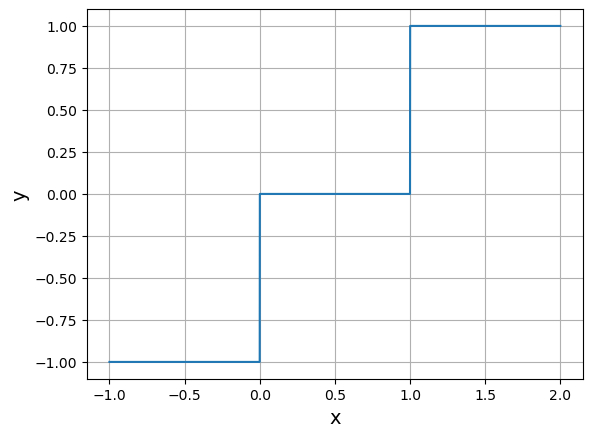

In [4]:
N = 10000

x = np.linspace(-1, 2, N).reshape(N,1)

y = funcao_descontinua(x).ravel()

plt.plot(x,y)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

### Encontrando os melhores hiperparâmetros.

In [5]:
# Dictionary with the hyperparameters to be checked. 
parameters = {
    'hidden_layer_sizes' : [(3,4), (3,6), (4,8)],
    'activation' : ['logistic', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}

# Instantiate MLPRegressor.
reg = MLPRegressor(max_iter=5000, random_state=seed)

# Instantiate KFold.
kf = KFold(n_splits=10, shuffle=True, random_state=seed)

# Instantiate GridSearchCV.
gs = GridSearchCV(reg, parameters, scoring='neg_mean_squared_error', verbose=4, cv=kf)

# Train the MLPRegressor with grid search.
gs.fit(x, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.002 total time=   1.0s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.003 total time=   0.9s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.002 total time=   0.7s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.002 total time=   0.4s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.001 total time=   0.4s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.002 total time=   0.4s
[CV 7/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.002 total time=   0.5s
[CV 8/10] END activation=logistic, hidden_layer_sizes=(3, 4), solver=lbfgs;, score=-0.001 total time=   0.1s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(3, 4), sol

[CV 7/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.068 total time=   0.8s
[CV 8/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.068 total time=   0.7s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.067 total time=   0.7s
[CV 10/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.068 total time=   0.7s
[CV 1/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=adam;, score=-0.062 total time=   0.1s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=adam;, score=-0.060 total time=   0.1s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=adam;, score=-0.060 total time=   0.1s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=adam;, score=-0.060 total time=   0.1s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(4, 8), solver=adam;, score=-0.058 total time=   0.1s
[CV 6/10] END activation=logist

[CV 6/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=-0.001 total time=   1.2s
[CV 7/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=-0.000 total time=   0.5s
[CV 8/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=-0.001 total time=   1.0s
[CV 9/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=-0.000 total time=   0.6s
[CV 10/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=lbfgs;, score=-0.000 total time=   0.5s
[CV 1/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.053 total time=   0.3s
[CV 2/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.051 total time=   0.3s
[CV 3/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.051 total time=   0.3s
[CV 4/10] END activation=relu, hidden_layer_sizes=(4, 8), solver=sgd;, score=-0.052 total time=   0.3s
[CV 5/10] END activation=relu, hidden_layer_sizes=(4, 8), solv

GridSearchCV(cv=KFold(n_splits=10, random_state=235, shuffle=True),
             estimator=MLPRegressor(max_iter=5000, random_state=235),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(3, 4), (3, 6), (4, 8)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error', verbose=4)

### Melhores hiperparâmetros

In [6]:
print(gs.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (4, 8), 'solver': 'lbfgs'}


### MSE do melhor modelo

In [7]:
y_pred = gs.predict(x)
        
mse = mean_squared_error(y_pred, y)
print('MSE:', mse)

MSE: 0.00040911706174301106


### Comparando as funções original e aproximada

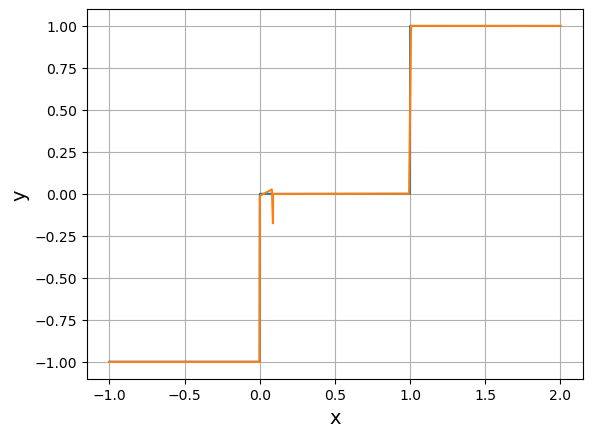

In [8]:
plt.plot(x,y)
plt.plot(x,y_pred)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()